In [1]:
import os
from Bio.SeqIO import QualityIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from utils import dna_rev_comp, translate_dna2aa
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.colors as mcolors
from scipy import stats
import os.path
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import yaml
import json

#from evaluation_functions import *
from importlib import reload
from characterization_from_blast_alignments import *
from plotting import *

In [25]:
## reload the evaluation functions
import plotting
reload(plotting)
from plotting import *
import functions_
reload(functions_)
from characterization_from_blast_alignments import *


### Analyzing Illumina sequencing of temporal datasets
Analysis using BLAST. 
Here, the region of interest was cut into four Sections, that we first need to merge before plotting. 
The mutation enrichment for each dataset was already calculated by running `preprocess_and_align_illumina_reads.py` (preprocessing and alignment), and then `analyze_mutation_enrichment.py` to calcuate the mutation enrichment. 

In [26]:
AraC_LOV2_annot = ['M0', 'S1', 'E2', 'E3', 'A4', 'Q5', 'N6', 'D7', 'P8', 'L9', 'L10', 'P11', 'G12', 'Y13', 'S14', 'F15', 'N16', 'A17', 'H18', 'L19', 'V20', 'A21', 'G22', 'L23', 'T24', 'P25', 'I26', 'E27', 'A28', 'N29', 'G30', 'Y31', 'L32', 'D33', 'F34', 'F35', 'I36', 'D37', 'R38', 'P39', 'L40', 'G41', 'M42', 'K43', 'G44', 'Y45', 'I46', 'L47', 'N48', 'L49', 'T50', 'I51', 'R52', 'G53', 'Q54', 'G55', 'V56', 'V57', 'K58', 'N59', 'Q60', 'G61', 'R62', 'E63', 'F64', 'V65', 'C66', 'R67', 'P68', 'G69', 'D70', 'I71', 'L72', 'L73', 'F74', 'P75', 'P76', 'G77', 'E78', 'I79', 'H80', 'H81', 'Y82', 'G83', 'R84', 'H85', 'P86', 'E87', 'A88', 'R89', 'E90', 'W91', 'Y92', 'H93', 'Q94', 'W95', 'V96', 'Y97', 'F98', 'R99', 'P100', 'R101', 'A102', 'Y103', 'W104', 'H105', 'E106', 'W107', 'L108', 'N109', 'W110', 'P111', 'S112', 'I113', 'F114', 'A115', 'N116', 'T117', 'G118', 'F119', 'F120', 'R121', 'P122', 'D123', 'E124', 'A125', 'H126', 'Q127', 'P128', 'H129', 'F130', 'S131', 'D132', 'L133', 'F134', 'G135', 'Q136', 'I137', 'I138', 'N139', 'A140', 'G141', 'Q142', 'G143', 'E144', 'G145', 'R146', 'Y147', 'S148', 'E149', 'L150', 'L151', 'A152', 'I153', 'N154', 'L155', 'I156', 'E157', 'Q158', 'L159', 'L160', 'L161', 'R162', 'R163', 'M164', 'E165', 'A166', 'I167', 'N168', 'E169', 'S170', 'S1', 'G2', 'L404', 'A405', 'T406', 'T407', 'L408', 'E409', 'R410', 'I411', 'E412', 'K413', 'N414', 'F415', 'V416', 'I417', 'T418', 'D419', 'P420', 'R421', 'L422', 'P423', 'D424', 'N425', 'P426', 'I427', 'I428', 'F429', 'A430', 'S431', 'D432', 'S433', 'F434', 'L435', 'Q436', 'L437', 'T438', 'E439', 'Y440', 'S441', 'R442', 'E443', 'E444', 'I445', 'L446', 'G447', 'R448', 'N449', 'C450', 'R451', 'F452', 'L453', 'Q454', 'G455', 'P456', 'E457', 'T458', 'D459', 'R460', 'A461', 'T462', 'V463', 'R464', 'K465', 'I466', 'R467', 'D468', 'A469', 'I470', 'D471', 'N472', 'Q473', 'T474', 'E475', 'V476', 'T477', 'V478', 'Q479', 'L480', 'I481', 'N482', 'Y483', 'T484', 'K485', 'S486', 'G487', 'K488', 'K489', 'F490', 'W491', 'N492', 'L493', 'F494', 'H495', 'L496', 'Q497', 'P498', 'M499', 'R500', 'D501', 'Q502', 'K503', 'G504', 'D505', 'V506', 'Q507', 'Y508', 'F509', 'I510', 'G511', 'V512', 'Q513', 'L514', 'D515', 'G516', 'T517', 'E518', 'H519', 'V520', 'R521', 'D522', 'A523', 'A524', 'E525', 'R526', 'E527', 'G528', 'V529', 'M530', 'L531', 'I532', 'K533', 'K534', 'T535', 'A536', 'E537', 'N538', 'I539', 'D540', 'E541', 'A542', 'A543', 'K544', 'G3', 'S4', 'L171', 'H172', 'P173', 'P174', 'M175', 'D176', 'N177', 'R178', 'V179', 'R180', 'E181', 'A182', 'C183', 'Q184', 'Y185', 'I186', 'S187', 'D188', 'H189', 'L190', 'A191', 'D192', 'S193', 'N194', 'F195', 'D196', 'I197', 'A198', 'S199', 'V200', 'A201', 'Q202', 'H203', 'V204', 'C205', 'L206', 'S207', 'P208', 'S209', 'R210', 'L211', 'S212', 'H213', 'L214', 'F215', 'R216', 'Q217', 'Q218', 'L219', 'G220', 'I221', 'S222', 'V223', 'L224', 'S225', 'W226', 'R227', 'E228', 'D229', 'Q230', 'R231', 'I232', 'S233', 'Q234', 'A235', 'K236', 'L237', 'L238', 'L239', 'S240', 'T241', 'T242', 'R243', 'M244', 'P245', 'I246', 'A247', 'T248', 'V249', 'G250', 'H251', 'N252', 'V253', 'G254', 'F255', 'D256', 'D257', 'Q258', 'L259', 'Y260', 'F261', 'S262', 'R263', 'V264', 'F265', 'K266', 'K267', 'C268', 'T269', 'G270', 'A271', 'S272', 'P273', 'S274', 'E275', 'F276', 'R277', 'A278', 'G279', 'C280', 'E281', 'E282', 'K283', 'V284', 'N285', 'D286', 'V287', 'A288', 'V289', 'K290', 'L291', 'S292', 'G293', '*294']

In [35]:
data_type = "AA" ## set the data type for the analysis
data_folder = "/home/student/anna/DMS_analysis/data/fastq/POGO/" ## choose correct data folder
cycles = ["Mut1", "Neg1", "Pos1", "Mut2", "Neg2", "Pos2","Mut3", "Neg3", "Pos3"] ## define POGO cycles
FigFolder = None #"output/POGO/blast/combined_plots/" ## define the folder for the output figures

with open(data_folder+"config.json") as file: 
    POGO_config = json.load(file)


amplicon = POGO_config["amplicon"][POGO_config["Primer_out_of_triplets"]["S1_fwd"]:] ## adjust for out of frame, was corrected during read preprocessing
amplicon_AA = translate_dna2aa(amplicon)

idx_steps = 1 if data_type != "AA" else 3

AraC_start = "ATGTCCGAGGA"
AraC_end = "AGCGGGTAA"

AraC_start_idx = amplicon.index(AraC_start)//idx_steps
AraC_end_idx = (amplicon.index(AraC_end)+len(AraC_end))//idx_steps

AraCLOV2_ref = amplicon[AraC_start_idx:AraC_end_idx] if data_type != "AA" else amplicon_AA[AraC_start_idx:AraC_end_idx]
amplicon_len = len(amplicon) if data_type == "DNA" else len(amplicon_AA)



In [28]:
NGS_runs= [f for f in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, f))]
print(NGS_runs)

['NegPos_C1C3', 'Mut_C2', 'Mut_C1C3', 'NegPos_C1C2C3_S2S3_rep1', 'NegPos_C1C2C3_S2S3_rep2', 'NegPos_C2', 'Mut_C1C2C3_S2S3_rep2', 'Mut_C1C2C3_S2S3_rep1']


In [30]:
## provide the right annotations (POGO cycles) per Bc per run 
Barcodes = dict(Mut_C1C3 =  {"BC1": "Mut1", 
                            "BC2" : "Mut3"},

                NegPos_C1C3 = {"BC1": "Neg1",
                                "BC2": "Pos1", 
                                "BC3": "Neg3", 
                                "BC4": "Pos3"},

                Mut_C2  = {"BC1": "Mut2"},

                NegPos_C2 = {"BC1": "Neg2",
                            "BC2": "Pos2"},
                            
                NegPos_C1C2C3_S2S3_rep1 = {"BC1": "Neg1", 
                "BC2": "Pos1", 
                "BC3": "Neg2", 
                "BC4": "Pos2", 
                "BC5": "Neg3", 
                "BC6": "Pos3"
                },
                            
                NegPos_C1C2C3_S2S3_rep2 = {"BC1": "Neg1", 
                "BC2": "Pos1", 
                "BC3": "Neg2", 
                "BC4": "Pos2", 
                "BC5": "Neg3", 
                "BC6": "Pos3"
                }, 
                
                Mut_C1C2C3_S2S3_rep2 = {"BC1": "Mut1", 
                     "BC2": "Mut2",
                     "BC3": "Mut3"},
                                        
                Mut_C1C2C3_S2S3_rep1 = {"BC1": "Mut1", 
                     "BC2": "Mut2",
                     "BC3": "Mut3"}                       
)

In [31]:
enrichments = pd.DataFrame(columns = [str(x) for x in list(range(amplicon_len))], index = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '*'], data = 0, dtype = np.float64)

all_enrichments = {key: enrichments.copy() for key in cycles}
all_coverages = {key: enrichments.copy() for key in cycles}

In [32]:
for ngs_run in NGS_runs:
    print(ngs_run)
    used_Barcodes = Barcodes[ngs_run].keys()
    with open("/home/student/anna/DMS_analysis/data/fastq/POGO/" + ngs_run + "/config.json", "r") as file:
        ngs_config = json.load(file)
    Sections = ngs_config["Sections"]
    for Bc in used_Barcodes: 
        for Section in Sections: 
            variant_name = f"{ngs_run}_{Bc}_{Section}_combined_roiFalse_{data_type}"
            enrichment = pd.read_csv(f"/home/student/anna/DMS_analysis/output/POGO/blast/enrichments/{ngs_run}/{variant_name}_all_variants.csv", index_col = 0)
            #print(enrichment)
            columns = list(enrichment.columns)
            cycle = Barcodes[ngs_run][Bc]
            print(ngs_run, Bc, cycle)
            #print(all_enrichments[cycle].loc[:,columns])
            all_enrichments[cycle].loc[:,columns] += enrichment
            #print(all_enrichments[cycle])

NegPos_C1C3
NegPos_C1C3 BC1 Neg1
NegPos_C1C3 BC1 Neg1
NegPos_C1C3 BC1 Neg1
NegPos_C1C3 BC1 Neg1
NegPos_C1C3 BC2 Pos1
NegPos_C1C3 BC2 Pos1
NegPos_C1C3 BC2 Pos1
NegPos_C1C3 BC2 Pos1
NegPos_C1C3 BC3 Neg3
NegPos_C1C3 BC3 Neg3
NegPos_C1C3 BC3 Neg3
NegPos_C1C3 BC3 Neg3
NegPos_C1C3 BC4 Pos3
NegPos_C1C3 BC4 Pos3
NegPos_C1C3 BC4 Pos3
NegPos_C1C3 BC4 Pos3
Mut_C2
Mut_C2 BC1 Mut2
Mut_C2 BC1 Mut2
Mut_C2 BC1 Mut2
Mut_C2 BC1 Mut2
Mut_C1C3
Mut_C1C3 BC1 Mut1
Mut_C1C3 BC1 Mut1
Mut_C1C3 BC1 Mut1
Mut_C1C3 BC1 Mut1
Mut_C1C3 BC2 Mut3
Mut_C1C3 BC2 Mut3
Mut_C1C3 BC2 Mut3
Mut_C1C3 BC2 Mut3
NegPos_C1C2C3_S2S3_rep1
NegPos_C1C2C3_S2S3_rep1 BC1 Neg1
NegPos_C1C2C3_S2S3_rep1 BC1 Neg1
NegPos_C1C2C3_S2S3_rep1 BC2 Pos1
NegPos_C1C2C3_S2S3_rep1 BC2 Pos1
NegPos_C1C2C3_S2S3_rep1 BC3 Neg2
NegPos_C1C2C3_S2S3_rep1 BC3 Neg2
NegPos_C1C2C3_S2S3_rep1 BC4 Pos2
NegPos_C1C2C3_S2S3_rep1 BC4 Pos2
NegPos_C1C2C3_S2S3_rep1 BC5 Neg3
NegPos_C1C2C3_S2S3_rep1 BC5 Neg3
NegPos_C1C2C3_S2S3_rep1 BC6 Pos3
NegPos_C1C2C3_S2S3_rep1 BC6 Pos3
NegPos_C

In [33]:
##combine enrichments for all cycles
combined_enrichments = {}

for cyclename, cycle_enrichment in all_enrichments.items():

    cycle_enrichment.columns = [int(x) for x in cycle_enrichment.columns]
    combined_enrichments[cyclename] = {}

    combined_enrichments[cyclename]["coverage"] = pd.DataFrame(cycle_enrichment.sum(axis = 0)[AraC_start_idx:AraC_end_idx]).T

    counts, relative_freq = mask_ref_in_variants_df(cycle_enrichment, ref_seq = amplicon_AA if data_type == "AA" else amplicon, data_type = data_type)
    
    combined_enrichments[cyclename]["mut_enrichment"]= [counts.iloc[:,AraC_start_idx:AraC_end_idx], relative_freq.iloc[:,AraC_start_idx:AraC_end_idx]]


## Visualization 
### Complete sequence 

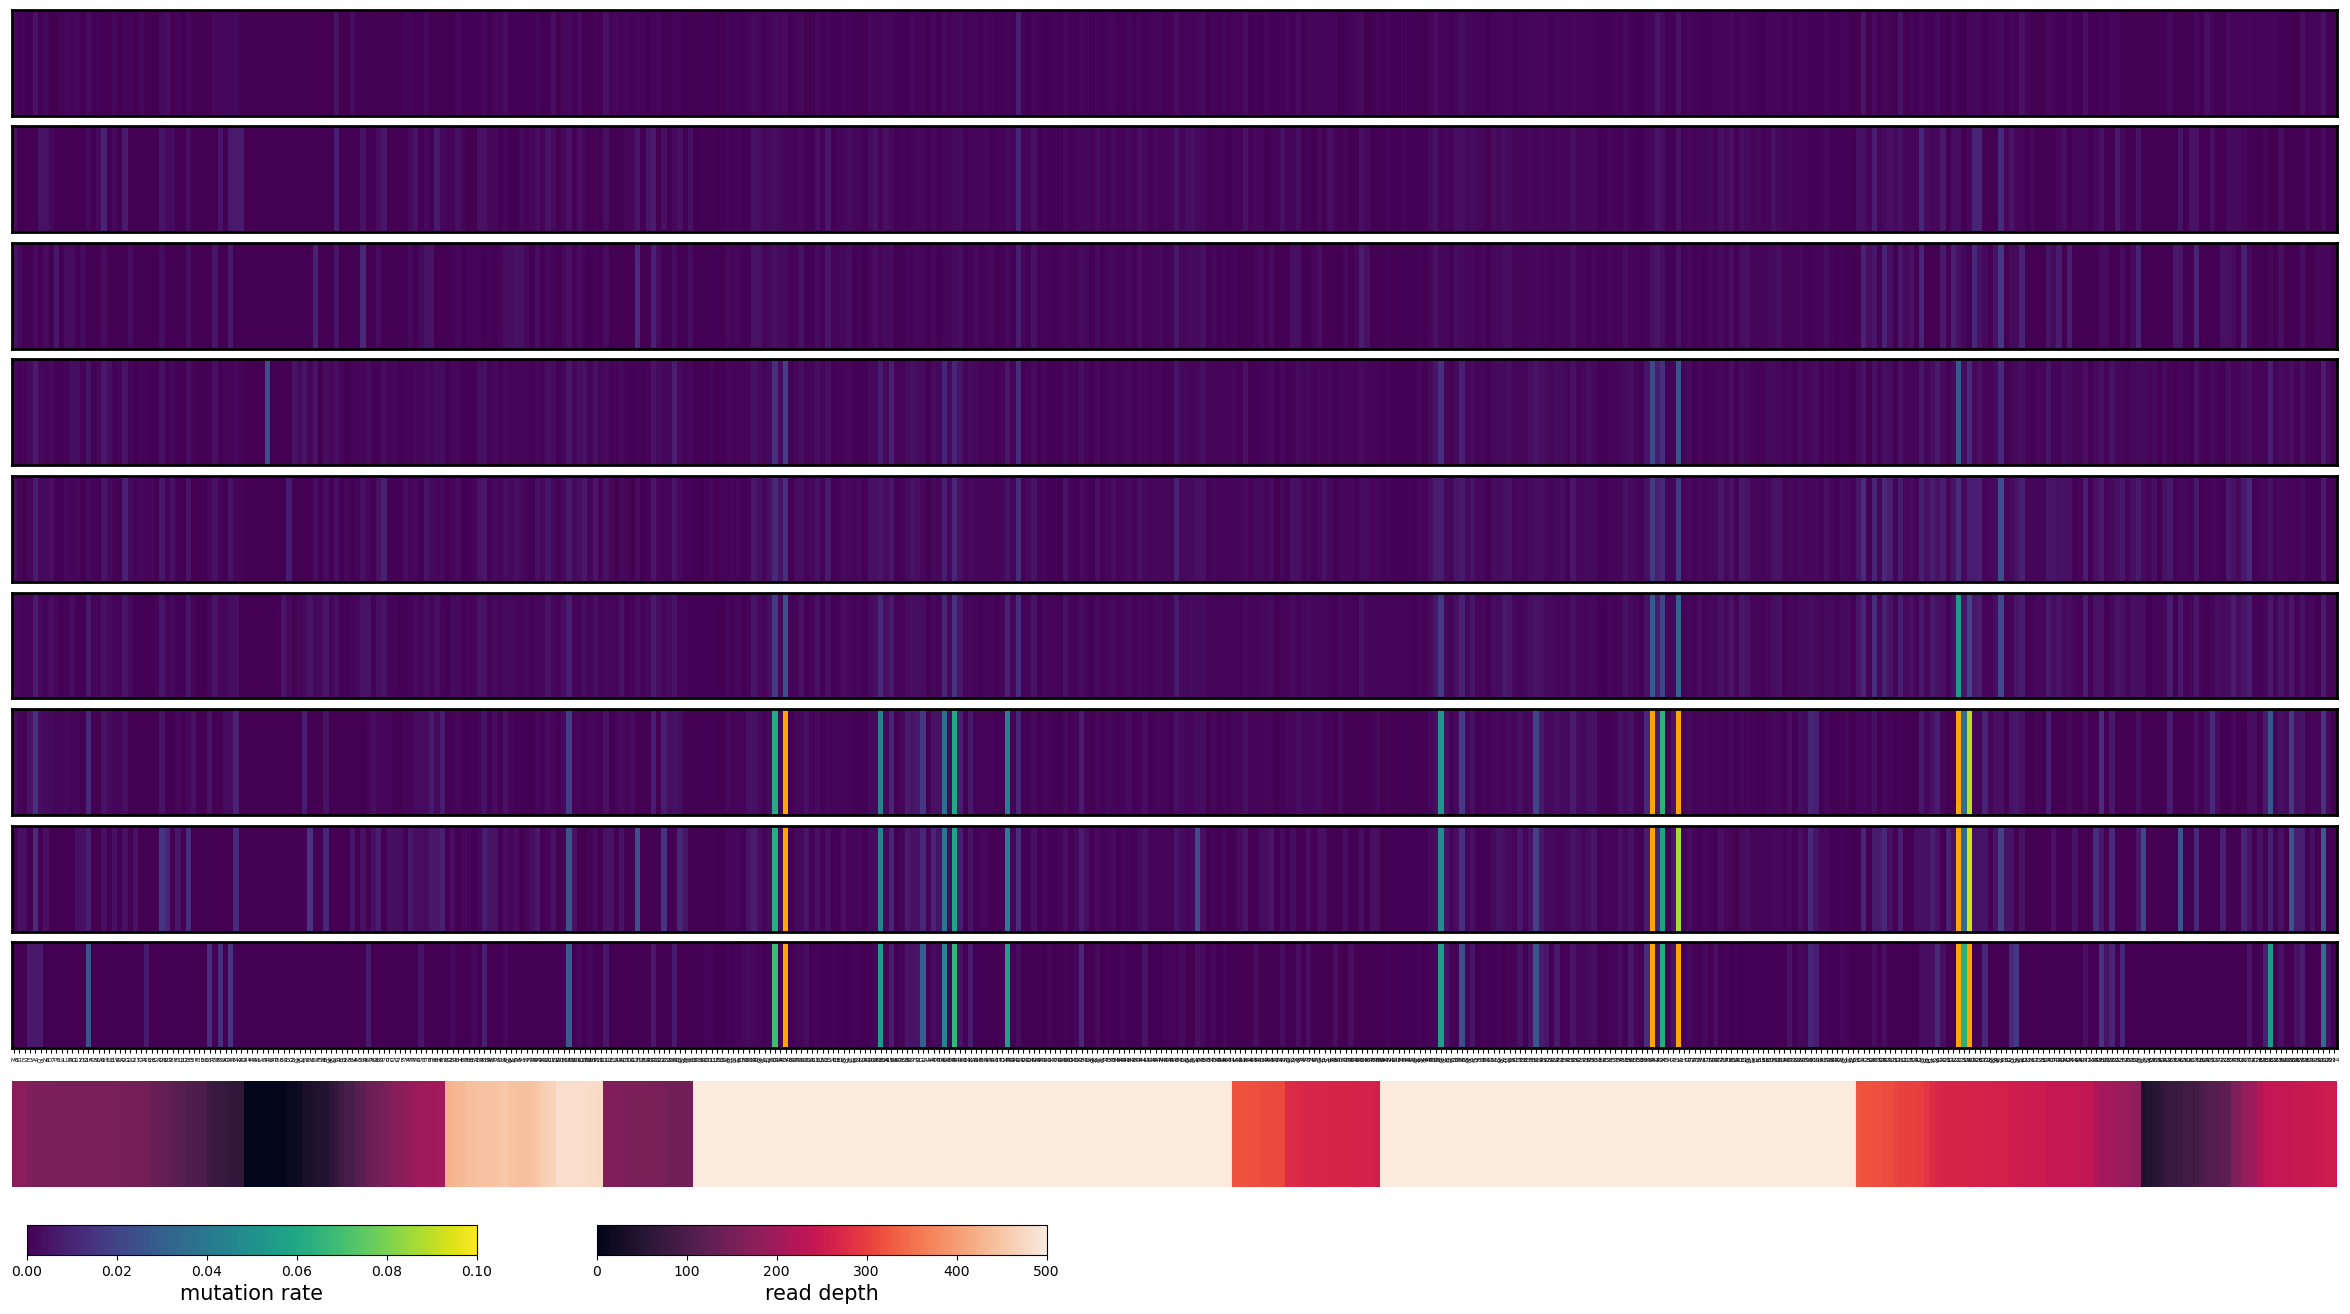

In [38]:
plot_temporal_enrichment(combined_enrichments, ref = AraC_LOV2_annot, vmax=0.1, show_cbar_for_each = False, plt_titles = None, show_plttitles = False, plot_coverage = True, bias_per_pos = None, show_only_pos = None, return_df = False, FigFolder = FigFolder, figsize = (30,15), data_type = "AA")

### Show only highly enriched positons

In [39]:
cov_filter_treshold = 50
mut_rate_filter_treshold = 0.03

high_mut_positions = []
low_cov_positions = []

for cyclename, sample_data in combined_enrichments.items():
    variant_relative_freq = pd.DataFrame(sample_data["mut_enrichment"][1].sum(axis=0)).T

    coverages = sample_data["coverage"]
    ## find pos with high mutation rate and low coverage
    low_cov_pos = [idx for idx, cov in enumerate(coverages) if cov < cov_filter_treshold]
    high_mut_pos = [idx for idx, mut_rate in enumerate(variant_relative_freq.values[0]) if mut_rate > mut_rate_filter_treshold]

    low_cov_positions.extend(low_cov_pos)
    high_mut_positions.extend(high_mut_pos)

## order dict values
all_high_mut_positions = list(sorted(set([idx for idx in high_mut_positions if idx not in low_cov_positions])))

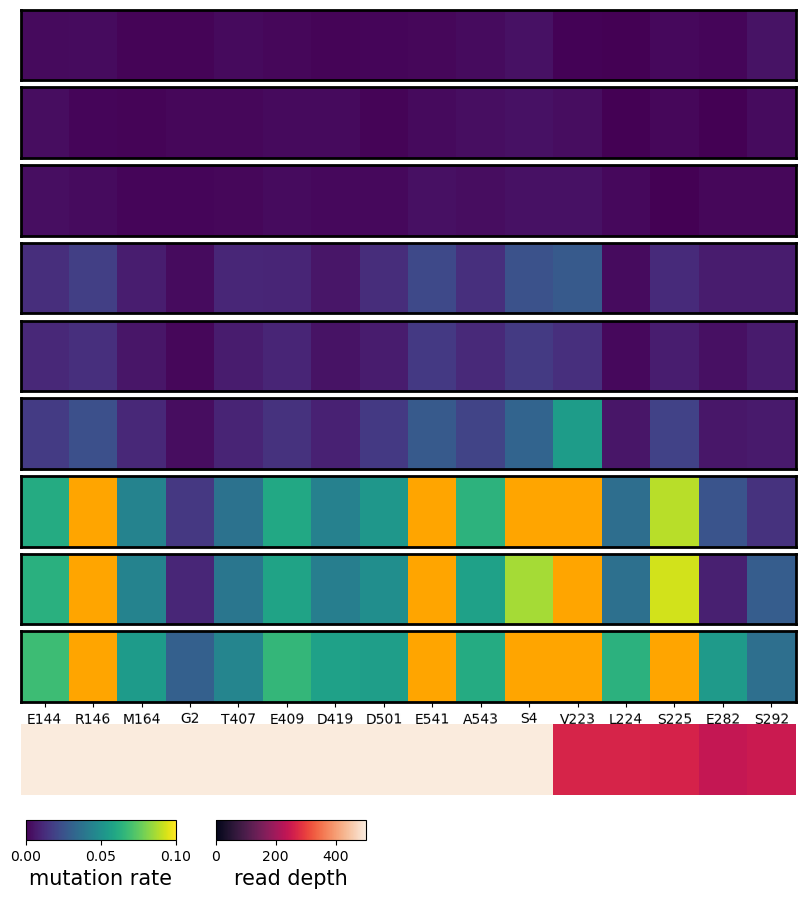

In [40]:
plot_temporal_enrichment(combined_enrichments, ref = AraC_LOV2_annot, vmax=0.1, show_cbar_for_each = False, plt_titles = None, show_plttitles = False, plot_coverage = True, bias_per_pos = None, show_only_pos = all_high_mut_positions, return_df = False, FigFolder = FigFolder, figsize = (10,10), data_type = "AA")

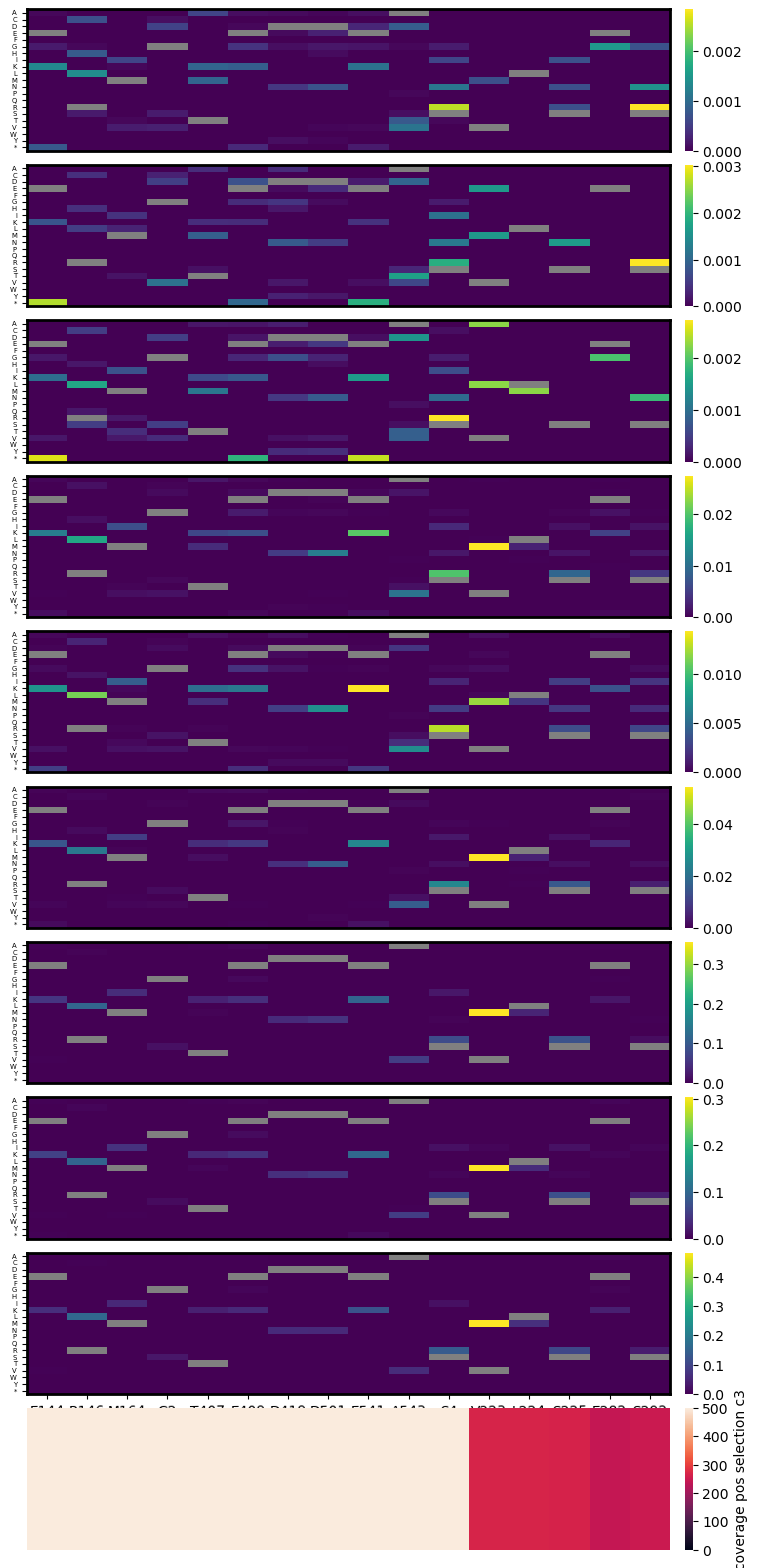

In [42]:
plot_temporal_enrichment(combined_enrichments, ref = AraC_LOV2_annot, combine_mut_rates=False, vmax = None,show_cbar_for_each = True, plt_titles = cycles, show_plttitles = False, plot_coverage = True, bias_per_pos = None, show_only_pos = all_high_mut_positions, return_df = False,  figsize = (10,20), data_type = "AA", FigFolder = FigFolder)